# Load Data

In [11]:
import gc
import h5py
import numpy as np

# load_path='F:/wangqi/nistcomparison/AAPlantD1_2GHz_TX1_hpol_run4_pp.mat'
# load_mat=h5py.File(load_path,'r')
# IQdata=load_mat['IQdata'][3600:39600,0:256].view('complex')
# locations=120
# records=300

load_path='F:/wangqi/nistdataset/GBurgD2_2GHz_TX1_longPol_run2_pp.mat'
load_mat=h5py.File(load_path,'r')
IQdata=load_mat['IQdata'][500:9800,0:256].view('complex')
locations=186
records=50

# Preprocess data 

In [12]:
# model parameters
k=1  #H为k+1个h
nf=1 #参考CSI的数量
index=[0,1]
input_channels=4
len_sequence = 256                  # the input dim of the model, you should not change the value
output_dim=2
d=2
def creatHimag_Alice(idx, k, nf):
    H=np.zeros((k+nf,len_sequence)).astype(complex)
    H=IQdata[idx-nf:idx+k]
    # print(np.shape(H))
    return  np.transpose(H[index])
    # return  np.transpose(H)
def creatHimag_Eve(idx, k, nf, d):
    H=np.zeros((k+nf,len_sequence)).astype(complex)
    H[nf:k+nf,:]=IQdata[idx-d*records:idx+k-d*records]
    H[0:nf,:]=IQdata[idx-nf:idx]
    return  np.transpose(H[index])
    # return  np.transpose(H)

recs=records*d
num_dataall=locations*records-recs-10
dataall_HimagA=np.zeros((num_dataall,len_sequence, k+nf)).astype(complex)
dataall_HimagE=np.zeros((num_dataall,len_sequence, k+nf)).astype(complex)
for i in range(recs,locations*records-10):
    dataall_HimagA[i-recs,:,:]=creatHimag_Alice(i,k=k,nf=nf)
    dataall_HimagE[i-recs,:,:]=creatHimag_Eve(i,k=k,nf=nf,d=d)

dataall_TW=np.concatenate((dataall_HimagA,dataall_HimagE),axis=0)
location=[i for i in range(2)]
test_data=dataall_TW
test_lab=[val for val in location for i in range(int(num_dataall))]

del dataall_HimagA, dataall_HimagE, dataall_TW
gc.collect()

26

# creat a image

In [13]:
import numpy as np
from numpy import fft

def minmaxscaler(data):
    min = np.amin(data)
    max = np.amax(data)    
    return (data - min)/(max-min)

def convert_pic0(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(h))
    img[1,:,:]=np.angle(h)
    img[2,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[3,:,:]=np.angle(fft.fft2(h))
    return img
def convert_pic1(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(h))
    img[1,:,:]=minmaxscaler(np.abs(h))
    img[2,:,:]=minmaxscaler(np.abs(h))
    img[3,:,:]=minmaxscaler(np.abs(h))
    return img
def convert_pic2(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=np.angle(h)
    img[1,:,:]=np.angle(h)
    img[2,:,:]=np.angle(h)
    img[3,:,:]=np.angle(h)
    return img
def convert_pic3(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[1,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[2,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[3,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    return img
def convert_pic4(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=np.angle(fft.fft2(h))
    img[1,:,:]=np.angle(fft.fft2(h))
    img[2,:,:]=np.angle(fft.fft2(h))
    img[3,:,:]=np.angle(fft.fft2(h))
    return img

# Define Dataset

In [14]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Dataset0(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset0).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic0(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset1(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset1).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic1(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset2(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset2).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic2(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset3(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset3).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic3(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset4(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset4).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic4(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

In [15]:
# import numpy as np
batch_size = 32                # batch size
model_path = './model.ckpt'     # the path where the checkpoint will be saved
device = 'cuda:2' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE: {device}')
# np.save('feature_tapfap_3132p5152p_run4',feature)
feature=np.load('feature_run2_tapfap_3132p5152p_HMrun4.npy')

DEVICE: cuda:2


# dataloder

In [16]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

class hDataset(Dataset):
    def __init__(self, k, X, y=None):
        super(hDataset).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = torch.FloatTensor(X)
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        # h = self.tfm(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)


train_data=feature[0:len(test_lab):2]
train_label=test_lab[0:len(test_lab):2]
valid_data=feature[1:len(test_lab):2]
valid_label=test_lab[1:len(test_lab):2]
# get dataset
train_set = hDataset(k,train_data, train_label)
valid_set = hDataset(k,valid_data, valid_label)

# remove raw feature to save memory
# del train_data, valid_data, valid_label
# gc.collect()
# get dataloader
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)

num_classes=2
net= nn.Linear(14976*5, num_classes) 
net.to(device)

learning_rate = 0.0005          # learning rate
weight_decay=1e-5
patience=5
criterion = nn.CrossEntropyLoss() 
# criterion = nn.BCELoss() 
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
params = [p for p in net.parameters() if p.requires_grad]
optimizer = optim.Adam(params, lr=learning_rate, weight_decay= weight_decay)

# Authentication

DEVICE: cuda:0
0.03460282916213275


<function matplotlib.pyplot.show(close=None, block=None)>

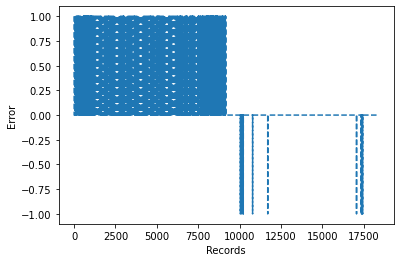

In [17]:
import torch
import torch.nn as nn

test_set = hDataset(k, feature, test_lab)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)

model_path = './model.ckpt'     # the path where the checkpoint will be saved
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE: {device}')
num_classes=2
_exp_name = "FC_hrun4_3132p5152p_sample"
net = nn.Linear(14976*5, num_classes) 
net.to(device)
net.load_state_dict(torch.load(f"{_exp_name}_best.ckpt"))
net.eval()
prediction=[]
with torch.no_grad():
    for data,_ in test_loader:
        test_pred = net(data.to(device))
        test_label = np.argmax(test_pred.cpu().data.numpy(), axis=1)
        prediction += test_label.squeeze().tolist()

error=np.count_nonzero(np.array(prediction)-np.array(test_lab))/len(prediction)

print(error)

error1=np.array(prediction)-np.array(test_lab)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(error1, linestyle="--")
# plt.legend(loc="best")
plt.xlabel('Records')
plt.ylabel('Error')
plt.show

In [18]:
print(error)

0.03460282916213275
